In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from collections import defaultdict

# The Task

The Task is to look for the most prominent Edge direction in the given images.

In [2]:
def read_image_grayscale(filename):
    return cv.imread(filename, 0)

In [3]:
def show_image_greyscale(image):
    plt.imshow(image, cmap='gray')
    plt.show()


def save_image(filename, image):
    cv.imwrite(filename, image)

In [4]:
def rotate_image(image, angle):
    rows, cols = image.shape
    rotation_matrix = cv.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv.warpAffine(image, rotation_matrix, (cols, rows))

In [5]:
kernel = np.array([[0, 0, 0],
                   [-1, 0, 1],
                   [0, 0, 0]])


def compute_gradient(image):
    return cv.filter2D(image, cv.CV_8U, kernel)


In [6]:
def compute_histogram(gradients, min=30):
    histogram = defaultdict(int)
    for row in gradients:
        for value in row:
            if value < min:
                continue
            histogram[value] += 1
    return histogram


def show_histogram(histogram):
    items_sorted_by_value = sorted(histogram.items(), key=lambda kv: kv[1])
    angles = list()
    values = list()
    for item in items_sorted_by_value:
        angles.append(item[0])
        values.append(item[1])
    plt.bar(angles, values)
    plt.show()
    

def most_prevalent_angle(histogram):
    items_sorted_by_value = sorted(histogram.items(), key=lambda kv: kv[1])
    return items_sorted_by_value[-1][0] - 90

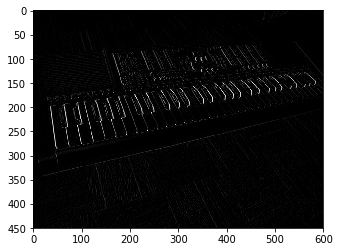

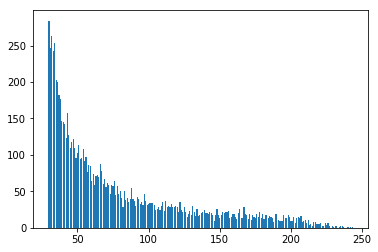

Angle: -60°


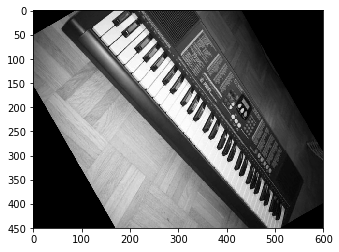

In [9]:
img = read_image_grayscale("images/keyb7.jpg")
gradients = compute_gradient(img)
show_image_greyscale(gradients)
histogram = compute_histogram(gradients) 
show_histogram(histogram)
angle = most_prevalent_angle(histogram)
print("Angle: {}°".format(angle))
rotated_img = rotate_image(img, angle)
show_image_greyscale(rotated_img)

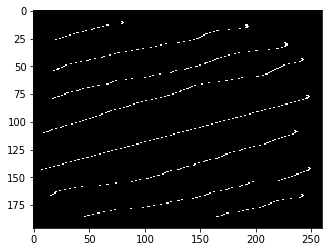

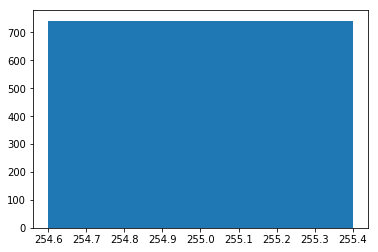

Angle: 165°


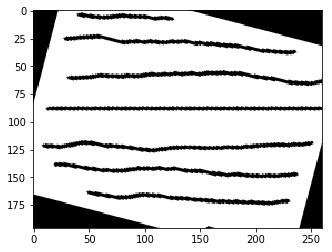

In [10]:
img = read_image_grayscale("images/lines1.png")
gradients = compute_gradient(img)
show_image_greyscale(gradients)
histogram = compute_histogram(gradients) 
show_histogram(histogram)
angle = most_prevalent_angle(histogram)
print("Angle: {}°".format(angle))
rotated_img = rotate_image(img, angle)
show_image_greyscale(rotated_img)

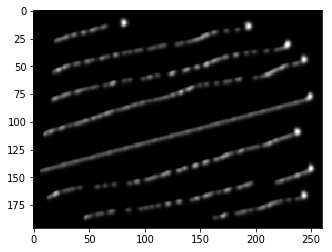

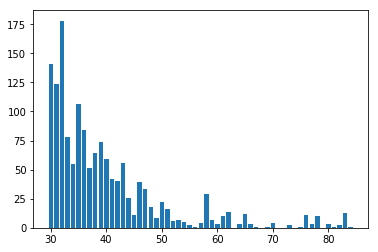

Angle: -58°


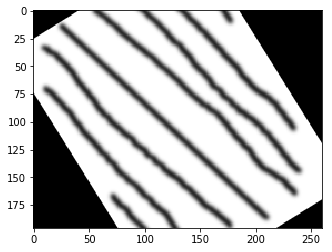

In [11]:
img = read_image_grayscale("images/lines2.png")
gradients = compute_gradient(img)
show_image_greyscale(gradients)
histogram = compute_histogram(gradients) 
show_histogram(histogram)
angle = most_prevalent_angle(histogram)
print("Angle: {}°".format(angle))
rotated_img = rotate_image(img, angle)
show_image_greyscale(rotated_img)